# Basic data visualization with python

Python has many popular and extensively used packages that focus exclusively on data visualization. For our purposes we can split them into two big classes:

1. Static visualizations
2. Interactive visualizations

We refer to interactive visualizations as those that can be served as a mobile app, a webpage, a static HTML file, that somehow renders a data visualization. The end users are able to interact with the rendered visualizations thanks to a mix of mostly javascript and in some cases also AJAX. There are many python packages that render the responsive and interactive HTML files, web apps, etc, with all the javascript necessary without much intervention. Some notable examples of these packages are [Bokeh](https://bokeh.pydata.org/en/latest/), [Plotly](https://plot.ly/python/), [Holoviews](http://holoviews.org/), and [Altair](https://altair-viz.github.io/).

To make things easier for us, we will focus on static visualizations. Many if not all static visualization packages for python rely heavily on [Matplotlib](https://matplotlib.org/) and its infrastructure. We will briefly introduce the key building blocks needed from matplotlib and then will turn to [seaborn](https://seaborn.pydata.org/), a package that provides some nice additions on top of Matplotlib to help visualize statistical data.

## What does Matplotlib do?

Matplotlib is a HUGE package. We usually interact with the high level `pyplot` (or `pylab`) module that follows a similar functional pattern as MATLAB.

`pyplot` allows us to create figures, place axes inside it, draw things inside the axes (lines, images, text), annotate the axes with labels, legends, titles, and then matplotlib renders the entire figure for the final visualization. The parts of a figure are the following:

<img src="images/anatomy.png">

To create a figure and add some axes into it we can follow many protocols, but we usually just do

In [1]:
# We use this magic to make matplotlib render its figures inline the notebook's cell
%matplotlib inline

from matplotlib import pyplot as plt

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

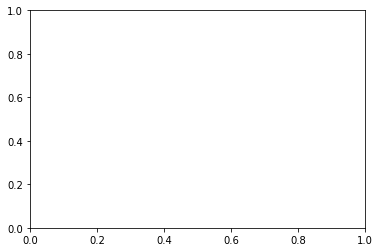

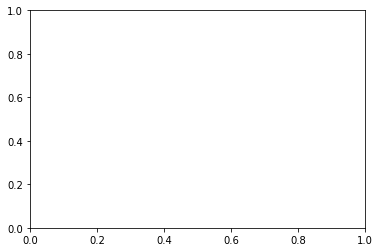

In [2]:
# Create a new axes in the current figure. If no figure exists, it creates a new one
plt.axes()
# Create a new figure
plt.figure()
# Create a new axes in the current figure
plt.axes()

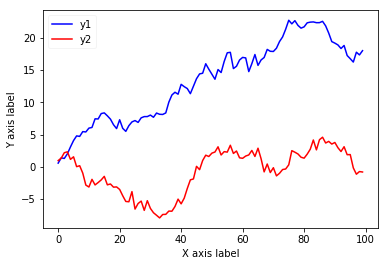

In [3]:
# We can then add content into the axes in two main ways:
import numpy as np
x = np.arange(100)
y1 = np.cumsum(np.random.randn(100))
y2 = np.cumsum(np.random.randn(100))

ax = plt.axes()
# Use pyplot to plot to the current axes (you can get the axes instance with plt.gca())
plt.plot(x, y1, color='blue')
# Use the axes object oriented methods to add plots
ax.plot(x, y2, color='red')
# We can also add annotations in these two ways
plt.xlabel('X axis label')
# Be aware that ylabel is a property of the Axes instance,
# so you need to work with the set_* and get_* methods instead
ax.set_ylabel('Y axis label')

plt.legend(['y1', 'y2'], loc='best', framealpha=0.2)

Shape of axs array = (3, 2)


Text(0.5, 1.0, 'The second column')

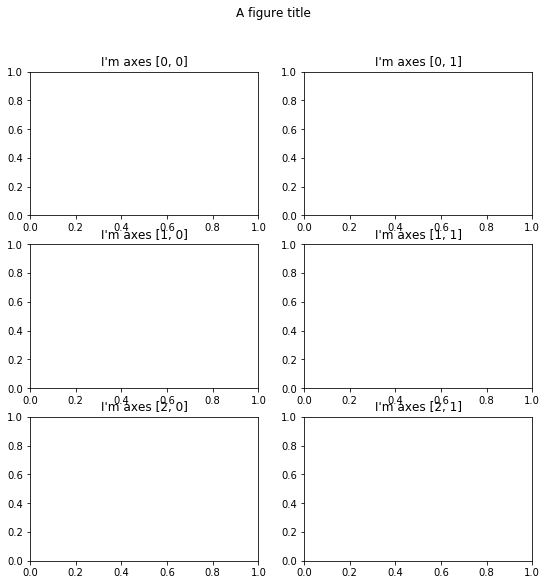

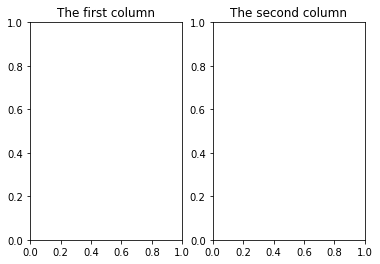

In [4]:
# If one wants to build a grid of many axes inside the same figure
# one can use plt.GridSpec or the easier subplot and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
fig.suptitle('A figure title')
# axs is an array of axes instances where one can add content
print('Shape of axs array = {}'.format(axs.shape))

for row, row_axs in enumerate(axs):
    for col, ax in enumerate(row_axs):
        ax.set_title("I'm axes [{}, {}]".format(row, col))

# Now using the more primitive subplot (without the trailing s)
plt.figure()
plt.subplot(1, 2, 1)
plt.title('The first column')
plt.subplot(122)
plt.title('The second column')

(3, 2)


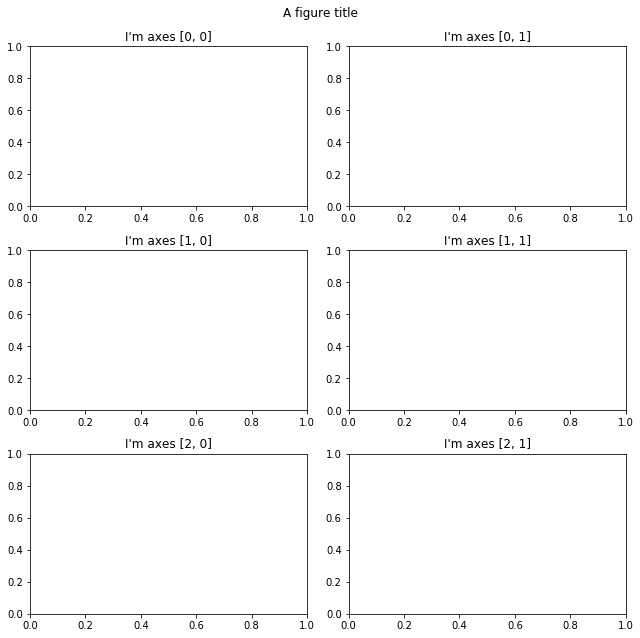

In [5]:
# But the above examples looks horrible, some axes titles overlap with
# axes labels, how can we adjust this?
# The easiest way is using the tight_layout method
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
fig.suptitle('A figure title')
# axs is an array of axes instances where one can add content
print(axs.shape)

for row, row_axs in enumerate(axs):
    for col, ax in enumerate(row_axs):
        ax.set_title("I'm axes [{}, {}]".format(row, col))
plt.tight_layout(rect=[0, 0, 1, 0.96]) # We could also use fig.tight_layout

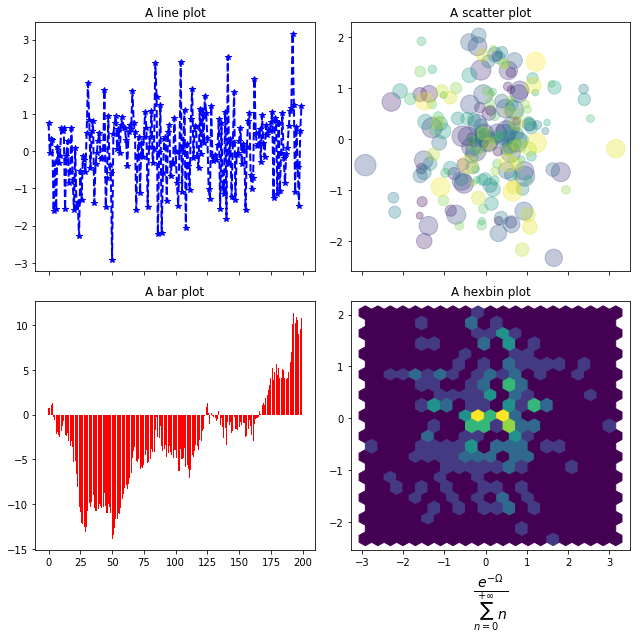

In [6]:
n = 200
x = np.arange(n)
y1 = np.random.randn(n)
y2 = np.random.randn(n)
y3 = np.cumsum(y1)

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(9, 9))

axs[0, 0].plot(x, y1, color='b', linewidth=2, linestyle='--',
               marker='*')
axs[0, 0].set_title('A line plot')

axs[1, 0].bar(x, y3, color='r')
axs[1, 0].set_title('A bar plot')

axs[0, 1].scatter(y1, y2, s=np.abs(y3) * 30 + 40, c=x/np.max(x),
                  cmap='viridis', alpha=0.3)
axs[0, 1].set_title('A scatter plot')

axs[1, 1].hexbin(y1, y2, gridsize=20)
axs[1, 1].set_title('A hexbin plot')
# We can add latex math in any text object
axs[1, 1].set_xlabel(r'$\frac{e^{-\Omega}}{\sum_{n = 0}^{+\infty}n}$',
                     fontsize=20)
fig.tight_layout()

Matplotlib is really powerfull, and pyplot has many useful low-level builtin visualization functions. It is encouraged to look at the [pyplot reference sheet](https://matplotlib.org/api/pyplot_summary.html) and some [matplotlib tutorials](https://matplotlib.org/tutorials/index.html) to learn other things that can be done.

Now that you've seen that we can do many many different things with the low level matplotlib, **what does [seaborn](https://seaborn.pydata.org/) help us to do?**

In [9]:
import pandas as pd
import seaborn as sns

# We'll first load some test datasets from seaborn to practice
df = sns.load_dataset('car_crashes')
df.head(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR


In [15]:
df.ins_premium.dtype

dtype('float64')

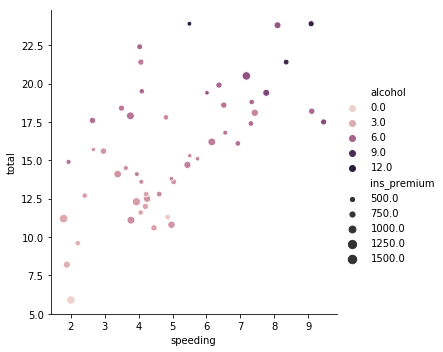

In [18]:
# Seaborn is aware of pandas DataFrames and Series, and integrates well with them
# We can pass column names and a Dataframe
sns.relplot(x='speeding', y='total', hue='alcohol', size='ins_premium', data=df)
# Notice also that seaborn automatically handled digitizing alcohol and ins_premium for us

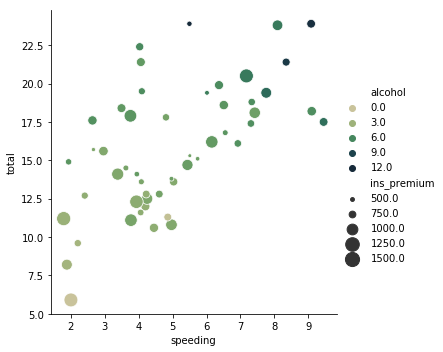

In [24]:
# Seaborn also uses nice cubehelix methods to get colormaps that
# are both expressive in brightness and color
sns.relplot(x='speeding', y='total', hue='alcohol',
            size='ins_premium', data=df,
            palette="ch:r=-.7,l=.75",
            sizes=(15, 200)
           )
# Notice also that seaborn automatically handled digitizing alcohol and ins_premium for us

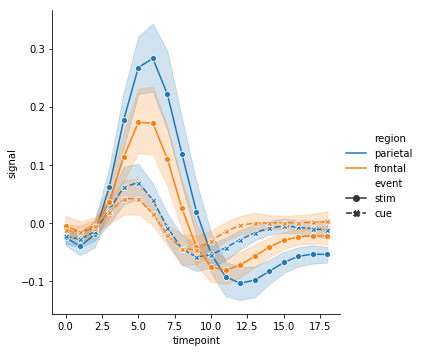

In [28]:
# All of these plots used the scatter kind, we'll show the line kind with another dataset
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=True, markers=True, kind="line", data=fmri);

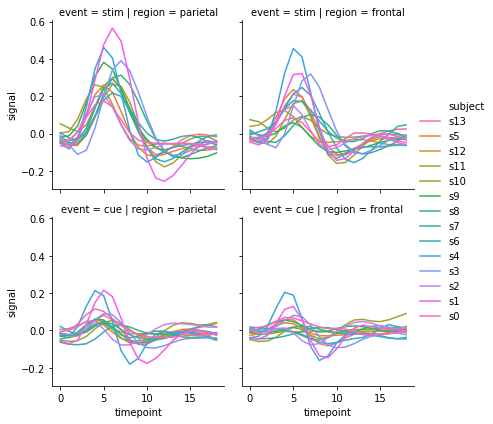

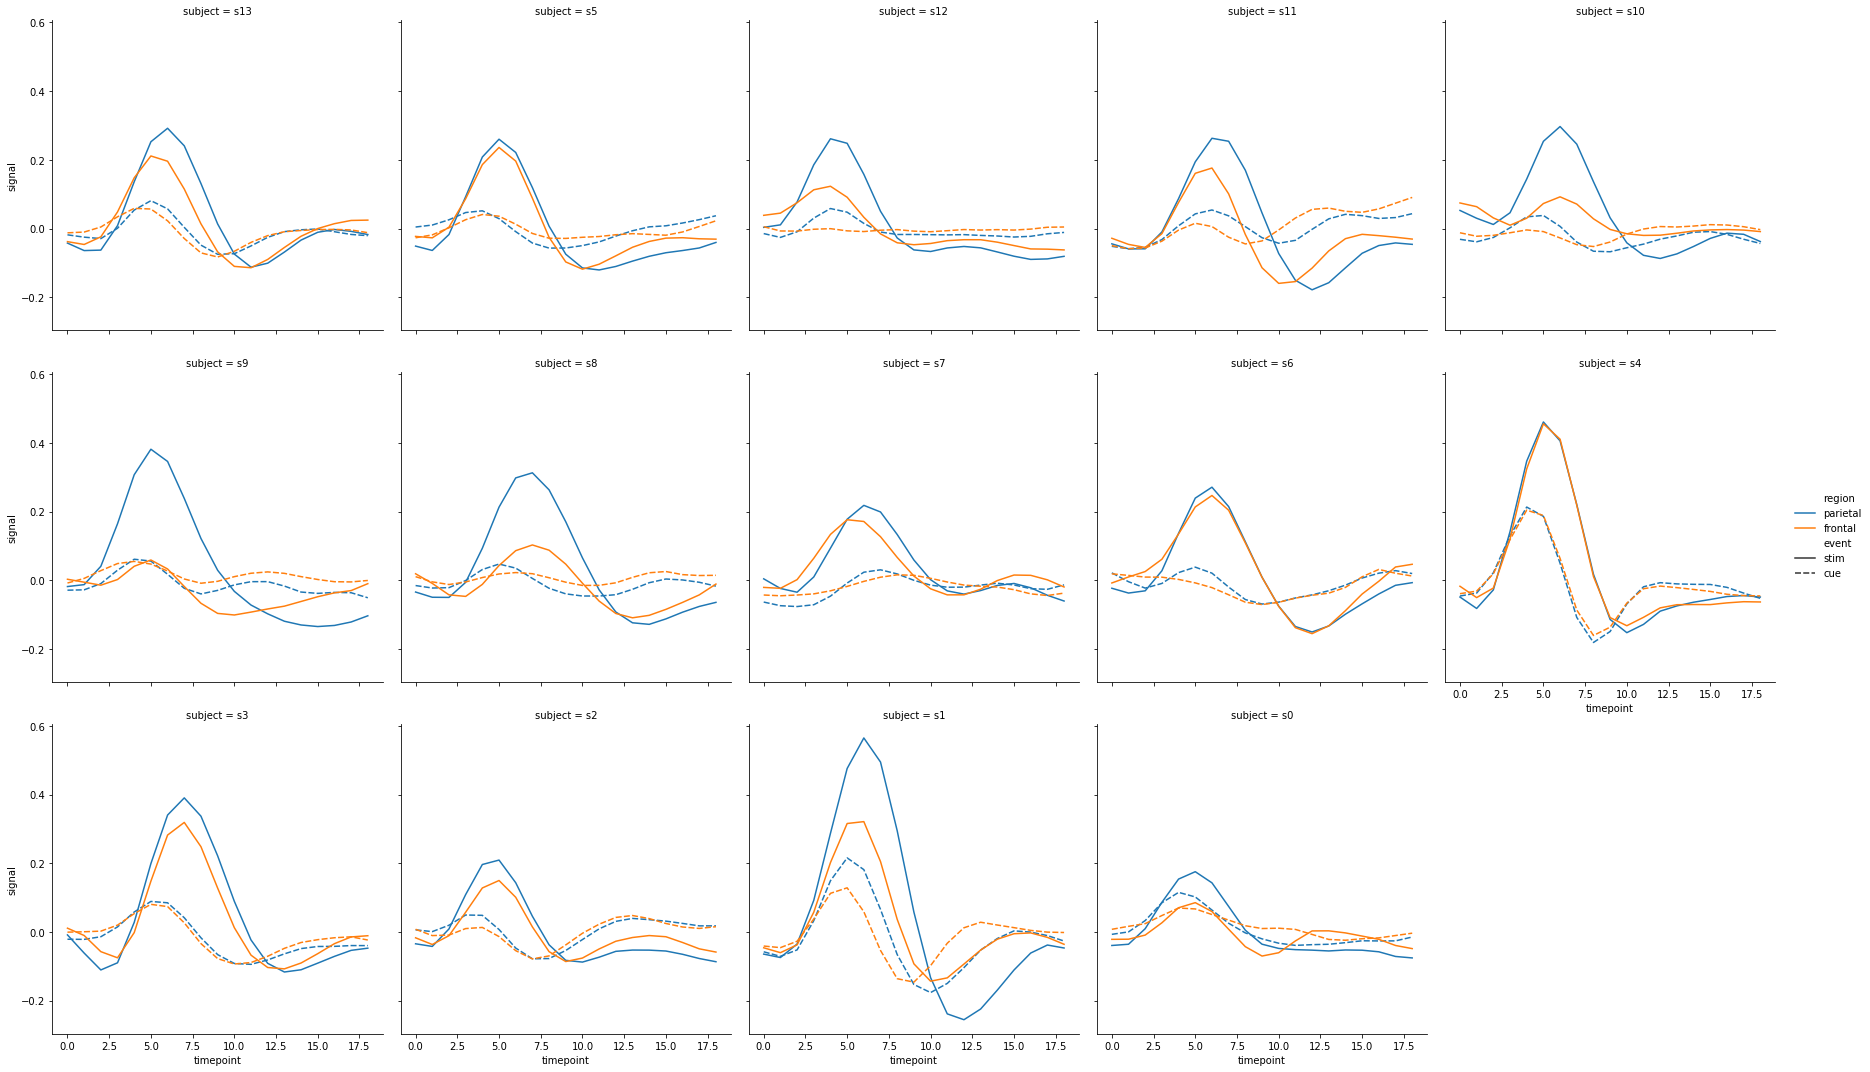

In [31]:
# Seaborn can even construct multiple axes instances placed
# on a grid (they call it FacetGrid) based on features of
# the dataset
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

sns.relplot(x="timepoint", y="signal", hue="region",
            style="event",
            col="subject", col_wrap=5,
            kind="line", estimator=None, data=fmri);

Seaborn has many more capabilities that help in plotting [categorical data](https://seaborn.pydata.org/tutorial/categorical.html), [regressions](https://seaborn.pydata.org/tutorial/regression.html), amongst many others, but we will finish looking at what we can do to visualize distributions (or more accurately, samples of probabliity distributions)



Note

Pyplot's state-machine environment behaves similarly to MATLAB and should be most familiar to users with MATLAB experience.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

import matplotlib.pyplot as plt
import numpy as np

Parts of a Figure
anatomy.webp]()
Figure

The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

The easiest way to create a new figure is with pyplot:

fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

    ../../_images/sphx_glr_usage_001.png ../../_images/sphx_glr_usage_002.png 

Axes

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and it's member functions are the primary entry point to working with the OO interface.
Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.
Artist

Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.
Types of inputs to plotting functions

All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

For example, to convert a pandas.DataFrame

a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values

and to covert a np.matrix

b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

